In [3]:
##Run all the scripts

%run Pyscripts\MT_SE_PT_Preprocess.py
%run Pyscripts\MT_SE_PT_Visusalisation.py

In [4]:
%run Pyscripts\MT_SE_PT_Funtions.py
%run Pyscripts\MT_SE_PT_Heatmap.py
%run Pyscripts\MT_SE_PT_Tuner.py

In [7]:
###Unbalanced Dataset

##Data from Gazli20210618Unbalanced
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    Gazli20210618Unbalanced = pd.read_excel('C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-2_750_20210618_UnbalancedDataset.xlsx',engine="openpyxl",index_col=0)


In [8]:
# Data Arrangement is totally different from the previous arrangements.
# Get new dataarrangement

###Balanced Dataset
##Data from Gazli20210618Unbalanced
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    Gazli20210618Balanced = pd.read_excel('C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-1_750_20210629_flamedetector_data(T6 and T7).xlsx',engine="openpyxl",index_col=0)



In [9]:
####Preprocess the data
##Train
dataTV = preprocess_indivburn_TV(Gazli20210618Balanced)
##Test 
dataTV2 = preprocess_indivburn_TV(Gazli20210618Unbalanced)

No na values


ValueError: Length mismatch: Expected axis has 7 elements, new values have 5 elements

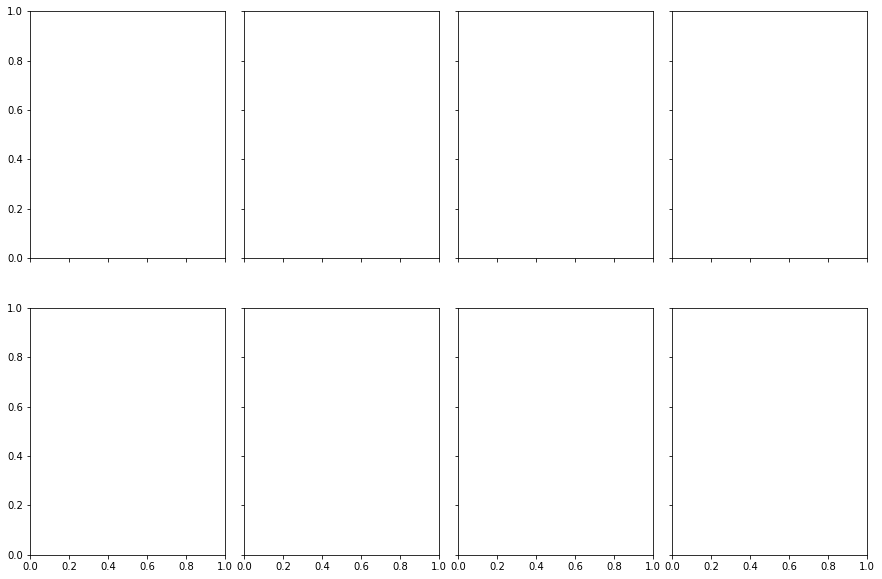

In [13]:
heatmap_burner_temperature(dataTV)
# heatmap_burner_pressure(dataTV)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', random_state=21,penalty = 'l2',max_iter=249)

In [15]:
###Training on Best evaluated burner and testing on new data dataTV2
###Train on more switching dataset and train on less switching dataset
bestburner = highestpredburner(dataTV,log_model)
evalmodeltest(dataTV,bestburner,log_model,dataTV2)


The Burner which gives the highest accuracy after testing on all other burners are:  4
The Burner which gives the lowest accuracy after testing on all other burners are: 2 



TypeError: 'LogisticRegression' object does not support indexing

In [ ]:
plotconfusiongrid(dataTV,log_model)

The total Number of False positives in the list is 9
The total Number of False negatives in the list is 95


(9, 95, 104)

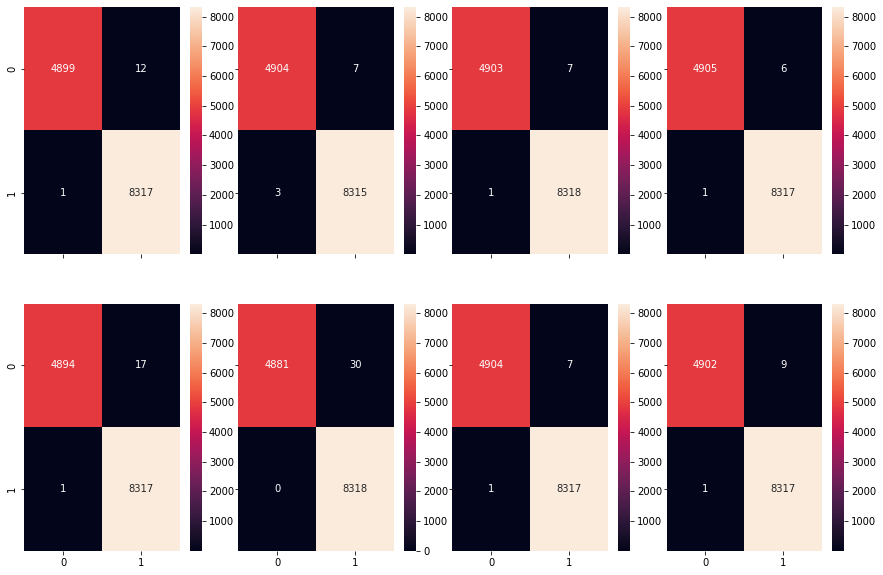

In [16]:
plotconfusiongrid(dataTV2,log_model)

In [17]:
###Training on Best evaluated burner and testing on new data dataTV
###Train on less switching dataset and testing on more switching dataset.
bestburner = highestpredburner(dataTV2,log_model)
evalmodeltest(dataTV2,bestburner,log_model,dataTV)


The Burner which gives the highest accuracy after testing on all other burners are:  0
The Burner which gives the lowest accuracy after testing on all other burners are: 7 



TypeError: 'LogisticRegression' object does not support indexing

The total Number of False positives in the list is 5
The total Number of False negatives in the list is 90


(5, 90, 95)

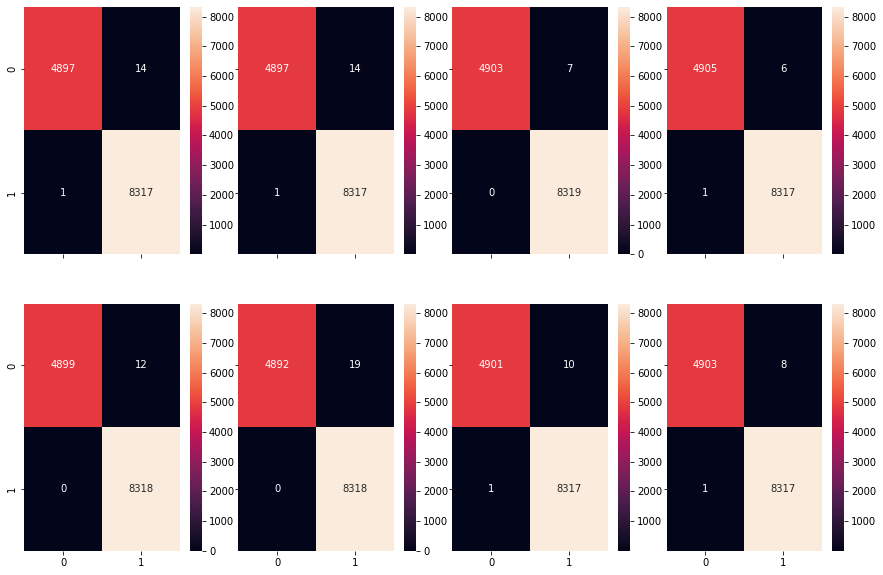

In [18]:
plotconfusiongrid(dataTV2,log_model)

The total Number of False positives in the list is 75
The total Number of False negatives in the list is 632


(75, 632, 707)

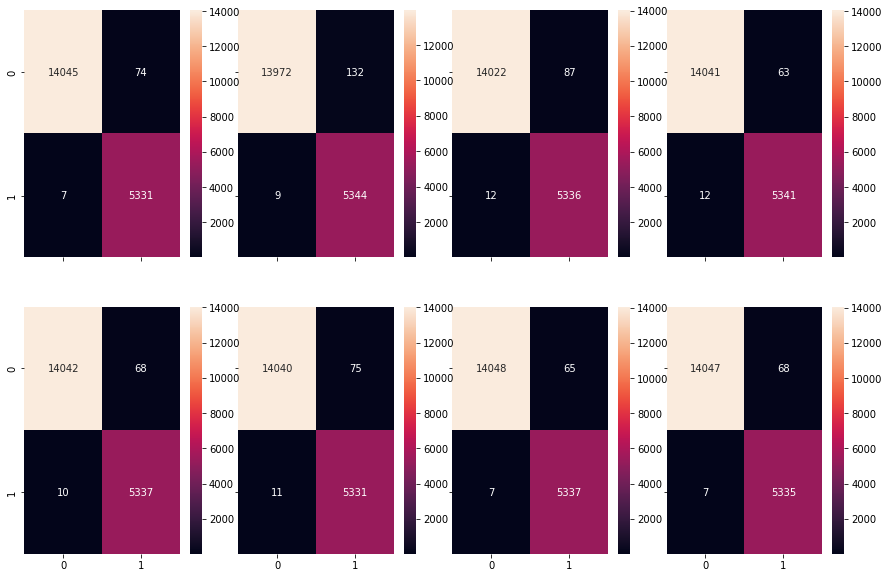

In [19]:
plotconfusiongrid(dataTV,log_model)

Improvement - Could take the mean of all the testing and see which burner testing is performing best when mean is taken.

## Logistic Rergression - Standard Scaler

In [ ]:
log_model_scale = LogisticRegression(solver='liblinear', random_state=21,penalty = 'l2',max_iter=249)
###Training on Best evaluated burner and testing on new data dataTV2
###Train on more switching dataset and test on less switching dataset
bestburner = highestpredburnerscale(dataTV,log_model_scale,scaler)
evalmodeltest(dataTV,bestburner,log_model_scale,dataTV2,S = True,MS = 'Standard')

In [ ]:
# plotconfusiongrid_scale(dataTV,log_model_scale,scaler)

In [ ]:
# plotconfusiongrid_scale(dataTV2,log_model_scale,scaler)

In [ ]:
###Training on Best evaluated burner and testing on new data dataTV2
###Train on less switching dataset and test on more switching dataset
bestburner = highestpredburnerscale(dataTV2,log_model_scale,scaler)
evalmodeltest(dataTV2,bestburner,log_model_scale,dataTV,S = True,MS = 'Standard')

### Logistic regression scaled- Minmax Sclaer

In [ ]:
###Training on Best evaluated burner and testing on new data dataTV2
###Train on more switching dataset and train on less switching dataset
bestburner = highestpredburnerscale(dataTV,log_model_scale,scalermin)
evalmodeltest(dataTV,bestburner,log_model_scale,dataTV2,S = True,MS = 'Minmax')

In [ ]:
plotconfusiongrid_scale(dataTV,log_model_scale,scalermin)

In [ ]:
plotconfusiongrid_scale(dataTV2,log_model_scale,scalermin)

In [ ]:
###Training on Best evaluated burner and testing on new data dataTV
###Train on less switching dataset and train on more switching dataset
bestburner = highestpredburnerscale(dataTV2,log_model_scale,scalermin)
evalmodeltest(dataTV2,bestburner,log_model_scale,dataTV,S = True,MS = 'Minmax')

In [ ]:
plotconfusiongrid_scale(dataTV,log_model_scale,scalermin)

In [ ]:
plotconfusiongrid_scale(dataTV2,log_model_scale,scalermin)

#### Coefficent differences


In [ ]:
log_model.coef_

In [ ]:
log_model_scale.coef_

You are right that although you should be able to calculate the OLS coefficient estimate in logit space, you can't do it directly because the logit, g(y)=logp1−p, goes either to −∞ for y=0 or ∞ for y=1. An added difficulty is that the variance in this model depends on x.

The likelihood for logistic regression is optimized by an algorithm called iteratively reweighted least squares (IRLS). There is a nice breakdown of this in Shalizi's Advanced Data Analysis from an Elementary Point of View, from which I have the details below:

To deal with the infinite logit problem, make a first-order Taylor approximation to g(y) around the point p such that g(y)≈g(p)+(y−p)g′(p). Since g(p) is by definition β0+βx, put that in there instead of g(p) and say that your effective response is z=β0+βx+(y−p)g′(p).
Calculate the variance V[Z|X=x]=V[(Y−p)g′(p)|X=x]=g′(p)2V(p). Use this to weight your samples so that you can simply do a weighted regression of z on x.
At this point you might ask yourself how you can use the regression coefficients you're trying to estimate to calculate your effective response, z. Of course you can't. And what is p anyway? That's where the iterative part of IRLS comes in: you start with some guess at the βs, for instance to set them all to 0. From this you can first calculate the fitted probabilities p, and second use these fitted probabilities and your current coefficient estimates to calculate z.

All this and you get a new estimate for your βs, and it should be closer to the right one, but probably not the right one. So you iterate: use the new coefficients to calculate new fitted probabilities, calculate new effective responses, new weights, and go again. Sooner or later, unless you're unlucky, the βs will converge to a nice estimate. Says Shalizi:

## Logistic Regression Difference Coefficents

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', random_state=21,penalty = 'l2',max_iter=249)

In [ ]:
log_model.fit(dataTV[0].iloc[:,1:],dataTV[0].iloc[:,0].astype('category'))

In [ ]:
coef1 = log_coef(dataTV,log_model)
flat_list = []
for i in coef1:
    flat_list.append(list(itertools.chain(*i)))

In [ ]:

# for i in flat_list:
#     print(sum(i))
[sum(i) for i in coef1[0]]
# a = map(sum,coef1[1])
# [item.sum() for item in coef1[1]]
# coef1[1]
# sum(flat_list[0])

In [ ]:
##Coefficient matrix
##Make a matrix of 8X8
# 
matrix = [ [ 0 for i in range(len(dataTV)) ] for j in range(len(dataTV))]

In [ ]:
# for i in range(len(matrix)):
#     for j in range(len(matrix)):
#         matrix[i][j] = sum(flat_list[i])-sum(flat_list[i])  

for i in range(len(matrix)):
    for j in range(len(matrix)):
        matrix[i][j] = abs(sum(flat_list[i]))-abs(sum(flat_list[j]))


In [ ]:


ax = sns.heatmap(matrix, annot=True)

coef_df = pd.DataFrame(data=matrix)
mask = np.zeros_like(coef_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(coef_df, mask=mask, vmax=.3, square=True,annot=True)

In [ ]:
sublist = []
for i in range(len(flat_list)):
    for i in range(len(flat_list)):
        sublist.append(sum([y - x for x in flat_list[i] for y in flat_list[j]]))

In [ ]:
for i in enumerate(sublist):
    print(i)
    
print(min(sublist))

In [ ]:
d  = flat_list[0]
f  = flat_list[1]


In [ ]:
import time
for i in flat_list:
    print(i)
    print(sum(i))
    time.sleep(1)

    

In [ ]:
import itertools

In [ ]:
flat_list = []
for i in coef1:
    flat_list.append(list(itertools.chain(*i)))

In [ ]:
flat_list